In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

In [25]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [26]:
xs = np.linspace(-3, 3, 1000) # 1000 points between -3 and 3
zs_wrt_x = f(xs, 0) # z = f(x, 0) = x^2 - 0^2 = x^2 # This is the cross-section of the function f(x, y) at y=0


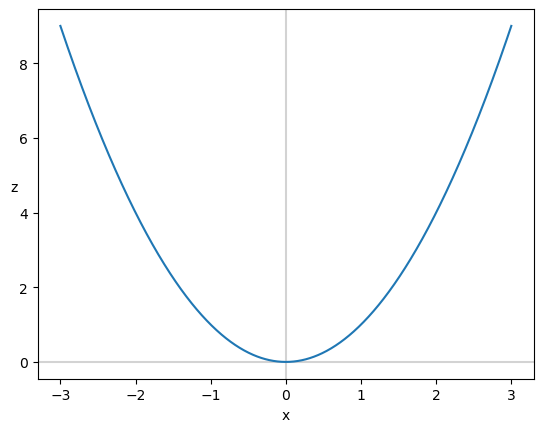

In [27]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

In [28]:
### To determine the slope of z.w.r.t.x curve, we can use the partial derivative from the slides: dz/dx = 2x

def dz_dx(x, y):
    return 2*x

In [29]:
x_samples = [-2, -1, 0, 1, 2]

In [30]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [31]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
            linestyle='dashed', linewidth=0.7, zorder=3)

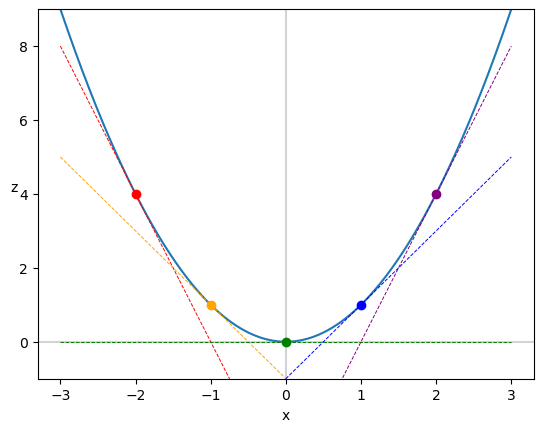

In [32]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, dz_dx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

# Volume of a cylinder

### Volume of a cylinder with radius r and height h is V = pi*r^2*h


In [33]:
def cylinder_volume(radius, height):
    return math.pi * radius**2 * height

radius = torch.tensor(3.0, requires_grad=True)
height = torch.tensor(5.0, requires_grad=True)

volume = cylinder_volume(radius, height)
volume.backward()
volume, height.grad, radius.grad

(tensor(141.3717, grad_fn=<MulBackward0>), tensor(28.2743), tensor(94.2478))